In [4]:
import matplotlib.pyplot as plt
from matplotlib import patches, rc, rcParams, lines, patheffects
from matplotlib.animation import FuncAnimation
import numpy as np
from tqdm import tqdm
plt.xkcd()
from IPython.display import display, clear_output, Video
from matplotlib.patches import Rectangle



100%|██████████| 200/200 [03:25<00:00,  1.03s/it]


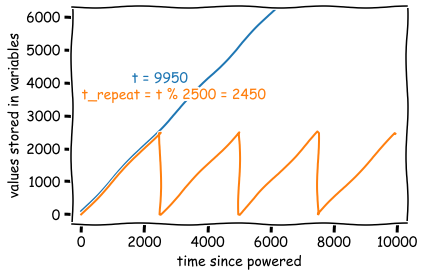

In [44]:
n = 10000
for i in tqdm(range(0, n, 50)):
    ts = np.arange(i)
    plt.close('all')
    plt.plot(ts,ts+100)
    plt.plot(ts,ts%2500)
    plt.xlabel("time since powered")
    plt.ylabel("values stored in variables")
    plt.xlim(0-300,n+300)
    plt.ylim(0-300,n*0.6+300)
    plt.text(10,n/2*0.8, "            t = %s"%i, color='C0')
    plt.text(10,n/2*0.7, "t_repeat = t %% 2500 = %s"%(i%2500), color='C1')
    plt.savefig("frame_%05d.png"%i,dpi=300,bbox_inches='tight')
    clear_output(wait=True)
    display(plt.gcf())

In [ ]:
!ffmpeg -y -framerate 20 -i 'frame_%05d.png' -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -preset slow -crf 20 out.mp4

In [3]:
!rm -f "*.png" "*.mp4"

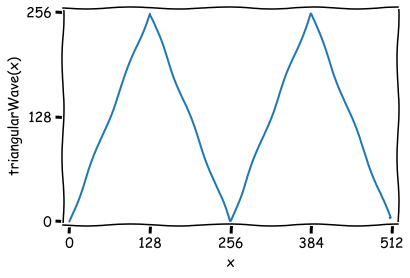

100%|██████████| 256/256 [02:06<00:00,  2.02it/s]


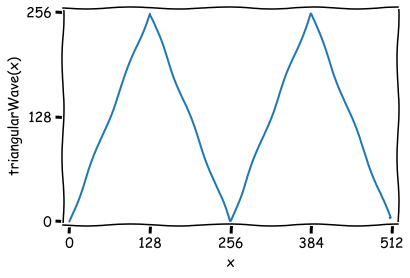

In [14]:
def triangular_wave(x):
    x = x%256
    if (x>0x7f):
        return (0xff-x)<<1
    else:
        return x<<1
        
n = 512
for i in tqdm(range(0, n, 2)):
    ts = np.arange(i)
    plt.close('all')
    plt.plot(ts,[triangular_wave(_) for _ in ts])
    plt.xlabel("x")
    plt.ylabel("triangularWave(x)")
    plt.ylim(-5,256+5)
    plt.xlim(-10,522)
    plt.yticks([0,128,256])
    plt.xticks([0,128,256,128*3,512])
    plt.savefig("frame_%05d.png"%i,dpi=300,bbox_inches='tight')
    clear_output(wait=True)
    display(plt.gcf())

In [16]:
!ffmpeg -y -framerate 20 -pattern_type glob -i 'frame_*.png' -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -preset slow -crf 20 out.mp4

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l

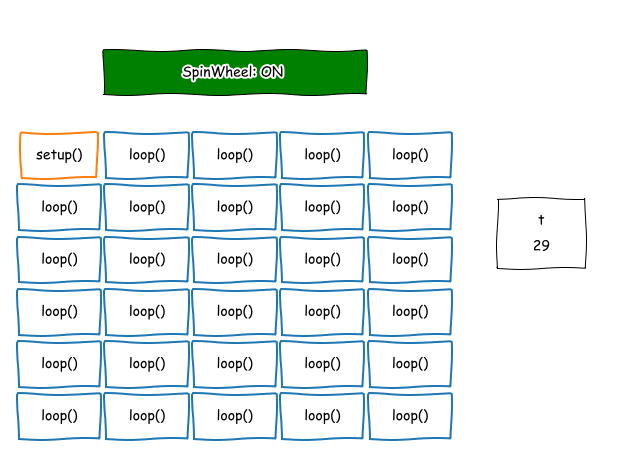

In [5]:
fig, ax = plt.subplots(figsize=(11, 8))

# Draw first frame
rect2 = Rectangle((10, 40), 30, 5, facecolor ='red',linewidth=1,edgecolor='black') 
ax.add_patch(rect2) 
plt.text(25,42, "SpinWheel: OFF ", color='black',horizontalalignment='center')
plt.xlim([0, 70]) 
plt.ylim([0, 50]) 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.set_xticks([])
ax.set_yticks([])

plt.savefig("timeLoop2_00000.png",dpi=300,bbox_inches='tight')
plt.savefig("timeLoop2_00001.png",dpi=300,bbox_inches='tight')
plt.savefig("timeLoop2_00002.png",dpi=300,bbox_inches='tight')

# Draw with SpinWheel on
plt.close('all')
fig, ax = plt.subplots(figsize=(11, 8))


rect2 = Rectangle((10, 40), 30, 5, facecolor ='green',linewidth=1,edgecolor='black') 
ax.add_patch(rect2) 
plt.text(25,42, "SpinWheel: ON ", color='black',horizontalalignment='center')
plt.xlim([0, 70]) 
plt.ylim([0, 50]) 
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("timeLoop2_00003.png",dpi=300,bbox_inches='tight')



# Add setup
plt.text(5,32.5, "setup()", color='black',horizontalalignment='center',bbox=dict(facecolor='none', edgecolor='C1', pad=15.0, lineWidth=2))
plt.savefig("timeLoop2_00004.png",dpi=300,bbox_inches='tight')

# Add setup
rect2 = Rectangle((55, 20), 10, 8, facecolor ='white',linewidth=1,edgecolor='black') 
ax.add_patch(rect2) 
plt.text(60,25, "t", color='black',horizontalalignment='center')
plt.text(60,22, "0", color='black',horizontalalignment='center')


plt.savefig("timeLoop2_00005.png",dpi=300,bbox_inches='tight')



# Add loop
x = 0
y = 30
for i in range(0,29): #29
    x = x+10;
    if (x > 40):
        x = 0
        y = y-6
    plt.text(x+5,y+2.5, "  loop()  ", color='black',horizontalalignment='center',bbox=dict(facecolor='none', edgecolor='C0', pad=15.0, lineWidth=2))
    rect2 = Rectangle((55, 20), 10, 8, facecolor ='white',linewidth=1,edgecolor='black') 
    ax.add_patch(rect2) 
    plt.text(60,25, "t", color='black',horizontalalignment='center',bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
    plt.text(60,22, i+1, color='black',horizontalalignment='center',bbox=dict(facecolor='white', edgecolor='none', pad=3.0))
    plt.savefig("timeLoop2_%05d.png"%(i+5.0),dpi=300,bbox_inches='tight')
    




# # Add random ones
# for i in range(0,20):
#     x = random()*40
#     y = random()*25
#     plt.text(x+5,y+2.5, "  loop()  ", color='black',horizontalalignment='center',bbox=dict(facecolor='white', edgecolor='C0', pad=15.0, lineWidth=2))
#    # plt.savefig("progLoop2_%05d.png"%(i+32.0),dpi=300,bbox_inches='tight')





In [6]:
!./ffmpeg -framerate 5 -i 'timeLoop2_%05d.png' -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -crf 20 time_loop.mp4

ffmpeg version N-98460-g6f84e92172-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2020 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxvid --enable-libzimg --enable-libzmq --enable-libzvbi --enable-version3 --pkg-co